In [1]:
%pylab inline
import numpy as np
from sigvisa import Sigvisa
from sigvisa.models.ttime import tt_predict
from sigvisa.utils.geog import dist_km

Populating the interactive namespace from numpy and matplotlib


In [2]:
s = Sigvisa()
slon, slat, selev = s.earthmodel.site_info("MKAR", 0)[:3]
print slon, slat, selev

print s.phaseids["Pg"]

82.2904 46.7937 0.6154
13


In [10]:
lons = np.linspace(0, 40.0, 500)
ds = [dist_km((slon, slat), (slon+l, slat)) for l in lons]
depth = 0
#tts = np.array([s.sigmodel.mean_travel_time(slon+l, slat, depth, 0, "MKAR", 3) for l in lons])

tts = np.zeros(lons.shape)
tts1 = np.zeros(lons.shape)
tts2 = np.zeros(lons.shape)
tts3 = np.zeros(lons.shape)

for i, l in enumerate(lons):
    try:
        tts[i] = s.sigmodel.mean_travel_time(slon+l, slat, depth, 0, "MKAR", 0)
    except:
        pass
    
    try:
        tts1[i] = s.sigmodel.mean_travel_time(slon+l, slat, depth, 0, "MKAR", 1)
    except:
        pass
    try:
        tts2[i] = s.sigmodel.mean_travel_time(slon+l, slat, depth, 0, "MKAR", 12)
    except:
        pass
    

(0, 12000)

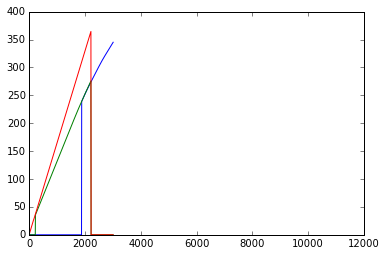

In [11]:
plt.plot(ds, tts)
plt.plot(ds, tts1)
plt.plot(ds, tts2)
#plt.plot(ds, tts3-tts)
#plt.ylim([-100, 100])
plt.xlim([0, 12000])